In [1]:
import pandas as pd

# -------------------------------
# 1️⃣ Read CSVs
# -------------------------------
flight_df = pd.read_csv(
    r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw\Flight Level Data.csv',
    usecols=[
        'flight_number',
        'scheduled_departure_datetime_local',
        'actual_departure_datetime_local',
        'total_seats'
    ]
)

pnr_flight_df = pd.read_csv(
    r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw\PNR+Flight+Level+Data.csv',
    usecols=[
        'flight_number',
        'scheduled_departure_date_local',
        'total_pax'
    ]
)

pnr_remarks_df = pd.read_csv(
    r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw\PNR Remark Level Data.csv',
    usecols=[
        'flight_number',
        'record_locator',
        'special_service_request'
    ]
)

# -------------------------------
# 2️⃣ Clean and aggregate SSR counts per flight
# -------------------------------
# Keep only rows with valid SSRs
pnr_remarks_df = pnr_remarks_df.dropna(subset=['special_service_request'])

# Count unique PNRs (record_locators) with SSR per flight
ssr_per_flight = (
    pnr_remarks_df
    .groupby('flight_number')['record_locator']
    .nunique()
    .reset_index(name='ssr_count')
)

# -------------------------------
# 3️⃣ Aggregate total passengers per flight
# -------------------------------
total_pax_per_flight = (
    pnr_flight_df
    .groupby('flight_number')['total_pax']
    .sum()
    .reset_index(name='total_passengers')
)

# -------------------------------
# 4️⃣ Merge datasets
# -------------------------------
merged_df = (
    flight_df
    .merge(total_pax_per_flight, on='flight_number', how='left')
    .merge(ssr_per_flight, on='flight_number', how='left')
)

# Fill missing SSRs or passenger counts with 0
merged_df[['ssr_count', 'total_passengers']] = merged_df[['ssr_count', 'total_passengers']].fillna(0)

# -------------------------------
# 5️⃣ Compute delay and load factor
# -------------------------------
# Convert datetime columns
merged_df['scheduled_departure_datetime_local'] = pd.to_datetime(merged_df['scheduled_departure_datetime_local'])
merged_df['actual_departure_datetime_local'] = pd.to_datetime(merged_df['actual_departure_datetime_local'])

# Delay in minutes
merged_df['departure_delay_minutes'] = (
    (merged_df['actual_departure_datetime_local'] - merged_df['scheduled_departure_datetime_local'])
    .dt.total_seconds() / 60
)

# Load factor
merged_df['load_factor'] = merged_df['total_passengers'] / merged_df['total_seats']

# -------------------------------
# 6️⃣ Analyze correlation and relationship
# -------------------------------
print("\nCorrelation Matrix:")
print(merged_df[['ssr_count', 'departure_delay_minutes', 'load_factor']].corr())

# Optional: simple regression-like check (without statsmodels)
# See average delay by SSR intensity
merged_df['ssr_group'] = pd.qcut(merged_df['ssr_count'], q=4, duplicates='drop')
avg_delay = merged_df.groupby('ssr_group')['departure_delay_minutes'].mean().reset_index()

print("\nAverage Delay by SSR Quartile:")
print(avg_delay)

# -------------------------------
# 7️⃣ Save for further analysis (optional)
# -------------------------------
merged_df.to_csv(
    r'C:\Users\seema\United-Airlines-CaseStudy\Data\processed\SSR_vs_Delay_Analysis.csv',
    index=False
)



Correlation Matrix:
                         ssr_count  departure_delay_minutes  load_factor
ssr_count                 1.000000                 0.063088     0.394715
departure_delay_minutes   0.063088                 1.000000    -0.003907
load_factor               0.394715                -0.003907     1.000000

Average Delay by SSR Quartile:
       ssr_group  departure_delay_minutes
0  (0.999, 21.0]                18.077551
1   (21.0, 37.0]                17.861814
2   (37.0, 67.0]                22.550831
3  (67.0, 204.0]                26.491291


C:\Users\seema\AppData\Local\Temp\ipykernel_24552\2335864685.py:95: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = merged_df.groupby('ssr_group')['departure_delay_minutes'].mean().reset_index()


OSError: Cannot save file into a non-existent directory: 'C:\Users\seema\United-Airlines-CaseStudy\Data\processed'

In [2]:
import pandas as pd
# File paths
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# Load the datasets
pnr_remark = pd.read_csv(f'{base_path}\PNR Remark Level Data.csv')
flight = pd.read_csv(f'{base_path}\Flight Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\PNR+Flight+Level+Data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\seema\\United-Airlines-CaseStudy\\Data\\raw\\PNR+Flight+Level+Data.csv'

In [3]:
import pandas as pd
# File paths
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# Load the datasets
pnr_remark = pd.read_csv(f'{base_path}\PNR Remark Level Data.csv')
flight = pd.read_csv(f'{base_path}\Flight Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\PNR Flight Level Data.csv')


In [4]:
import pandas as pd
# File paths
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# Load the datasets
pnr_remark = pd.read_csv(f'{base_path}\PNR Remark Level Data.csv')
flight = pd.read_csv(f'{base_path}\Flight Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\PNR Flight Level Data.csv')

In [5]:
import pandas as pd
# File paths
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# Load the datasets
pnr_remark = pd.read_csv(f'{base_path}\PNR Remark Level Data.csv')
flight = pd.read_csv(f'{base_path}\Flight Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\PNR Flight Level Data.csv')
print(pnr_remark.head())
print(flight.head())
print(pnr_flight.head())


  record_locator pnr_creation_date  flight_number special_service_request
0     PNR_153489        2025-07-04            308      Airport Wheelchair
1     PNR_153489        2025-07-04           2182      Airport Wheelchair
2     PNR_153508        2025-07-10           2649      Airport Wheelchair
3     PNR_153508        2025-07-10           2100      Airport Wheelchair
4     PNR_153521        2025-03-01            970     Unaccompanied Minor
  company_id  flight_number scheduled_departure_date_local  \
0         OO           4792                     04-08-2025   
1         UA            920                     03-08-2025   
2         UA           1776                     10-08-2025   
3         OO           5790                     06-08-2025   
4         UA           1398                     05-08-2025   

  scheduled_departure_station_code scheduled_arrival_station_code  \
0                              ORD                            ROA   
1                              ORD           

In [6]:
merge1 = pd.merge(pnr_flight, pnr_remark, on='pnr', how='left')
print("After merging PNR Flight + PNR Remark Data:", merge1.shape)


KeyError: 'pnr'

In [7]:
import pandas as pd
# File paths
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# Load the datasets
pnr_remark = pd.read_csv(f'{base_path}\PNR Remark Level Data.csv')
flight = pd.read_csv(f'{base_path}\Flight Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\PNR Flight Level Data.csv')
merge1 = pd.merge(pnr_flight, pnr_remark, on='pnr', how='left')
print("After merging PNR Flight + PNR Remark Data:", merge1.shape)


KeyError: 'pnr'

In [8]:
import pandas as pd

base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# Load the two datasets
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')

# Check column names to confirm
print(pnr_remark.columns)
print(pnr_flight.columns)


Index(['record_locator', 'pnr_creation_date', 'flight_number',
       'special_service_request'],
      dtype='object')
Index(['company_id', 'flight_number', 'scheduled_departure_date_local',
       'scheduled_departure_station_code', 'scheduled_arrival_station_code',
       'record_locator', 'pnr_creation_date', 'total_pax', 'is_child',
       'basic_economy_ind', 'is_stroller_user', 'lap_child_count'],
      dtype='object')


In [9]:
import pandas as pd

base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# Load the two datasets
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

print("After merging PNR Flight + PNR Remark Data:", merge1.shape)
merge1.head()


After merging PNR Flight + PNR Remark Data: (688837, 13)


,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,record_locator,pnr_creation_date,total_pax,is_child,basic_economy_ind,is_stroller_user,lap_child_count,special_service_request
0,UA,2494,2025-08-04,ORD,MCI,PNR_520583,2025-07-07,1,N,0,N,0,NaN
1,UA,2483,2025-08-06,ORD,IAH,PNR_296107,2025-03-28,1,N,0,N,0,NaN
2,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,N,0,NaN
3,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,N,0,N,1,NaN
4,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,Y,0,NaN


In [10]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

pnr_remark_fp = f'{base_path}\\PNR Remark Level Data.csv'
pnr_flight_fp = f'{base_path}\\PNR Flight Level Data.csv'
flight_fp = f'{base_path}\\Flight Level Data.csv'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(pnr_remark_fp)
pnr_flight = pd.read_csv(pnr_flight_fp)
flight = pd.read_csv(flight_fp)

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)

# -------------------------
# Step 2 - Merge PNR Remark + PNR Flight on record_locator, pnr_creation_date, flight_number
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

print("✅ After merging PNR Flight + PNR Remark:", merge1.shape)

# -------------------------
# Step 3 - Prepare date columns for merging with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(flight['actual_departure_datetime_local'], errors='coerce')

# -------------------------
# Step 4 - Merge with Flight Level Data on flight_number + scheduled_departure_date_local
# -------------------------
final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local','scheduled_departure_datetime_local','actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

print("✅ After merging with Flight Level Data:", final_df.shape)

# -------------------------
# Step 5 - Compute departure delay in minutes
# -------------------------
final_df['departure_delay_minutes'] = (
    (final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']).dt.total_seconds() / 60
)

# -------------------------
# Step 6 - Compute load factor
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 7 - Handle missing SSRs (no SSR = 0)
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 8 - Aggregate SSR per flight-date (optional, if you want flight-level summary)
# -------------------------
ssr_count_per_flight = final_df.groupby(['flight_number','scheduled_departure_date_local']).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean')
).reset_index()

print("✅ Sample flight-level SSR summary:")
print(ssr_count_per_flight.head())

# -------------------------
# Step 9 - Save final merged dataset (passenger-level) and flight-level summary
# -------------------------
final_df.to_csv(f'{base_path}\\processed\\merged_passenger_level.csv', index=False)
ssr_count_per_flight.to_csv(f'{base_path}\\processed\\merged_flight_level_summary.csv', index=False)

print("✅ Saved passenger-level and flight-level summary CSVs!")


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (8099, 15)
✅ After merging PNR Flight + PNR Remark: (688837, 13)
✅ After merging with Flight Level Data: (692219, 16)
✅ Sample flight-level SSR summary:
   flight_number scheduled_departure_date_local  ssr_count  total_passengers  \
0              3                     2025-08-01          2               177   
1              3                     2025-08-02          2               183   
2              3                     2025-08-03          3               199   
3              3                     2025-08-04          3               199   
4              3                     2025-08-05          5               180   

   total_seats  avg_load_factor  avg_delay  
0        167.0         0.010599      -12.0  
1        167.0         0.011297        4.0  
2        167.0         0.010362        6.0  
3        167.0         0.011798        9.0  
4        167.0         0.009980       11.0  


OSError: Cannot save file into a non-existent directory: 'C:\Users\seema\United-Airlines-CaseStudy\Data\raw\processed'

In [11]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')

# -------------------------
# Step 2 - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 3 - Prepare date columns
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(flight['actual_departure_datetime_local'], errors='coerce')

# -------------------------
# Step 4 - Merge with Flight Level Data
# -------------------------
final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local','scheduled_departure_datetime_local','actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 5 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    (final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']).dt.total_seconds() / 60
)

# -------------------------
# Step 6 - Compute load factor
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 7 - Handle missing SSRs
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 8 - Aggregate SSR per flight
# -------------------------
ssr_count_per_flight = final_df.groupby(['flight_number','scheduled_departure_date_local']).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean')
).reset_index()

print("✅ Flight-level SSR summary (first 10 rows):")
print(ssr_count_per_flight.head(10))

# -------------------------
# Step 9 - Quick analysis
# -------------------------
# Check correlation between SSR count and avg delay, controlling for load
print("\nCorrelation SSR vs Delay vs Load Factor:")
print(ssr_count_per_flight[['ssr_count','avg_delay','avg_load_factor']].corr())


✅ Flight-level SSR summary (first 10 rows):
   flight_number scheduled_departure_date_local  ssr_count  total_passengers  \
0              3                     2025-08-01          2               177   
1              3                     2025-08-02          2               183   
2              3                     2025-08-03          3               199   
3              3                     2025-08-04          3               199   
4              3                     2025-08-05          5               180   
5              3                     2025-08-06          4               175   
6              3                     2025-08-07          2               184   
7              3                     2025-08-08          4               201   
8              3                     2025-08-09          2               179   
9              3                     2025-08-10          1               146   

   total_seats  avg_load_factor  avg_delay  
0        167.0         0.01059

In [12]:
import pandas as pd

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

print("✅ After merging PNR Flight + PNR Remark Data:", merge1.shape)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
# Ensure date columns are in the same format for merging
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(flight['actual_departure_datetime_local'], errors='coerce')

# Merge passenger-level data with flight-level data
final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local','scheduled_departure_datetime_local',
            'actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

print("✅ After merging with Flight Level Data:", final_df.shape)
final_df.head()


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (8099, 15)
✅ After merging PNR Flight + PNR Remark Data: (688837, 13)
✅ After merging with Flight Level Data: (692219, 16)


,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,record_locator,pnr_creation_date,total_pax,is_child,basic_economy_ind,is_stroller_user,lap_child_count,special_service_request,scheduled_departure_datetime_local,actual_departure_datetime_local,total_seats
0,UA,2494,2025-08-04,ORD,MCI,PNR_520583,2025-07-07,1,N,0,N,0,NaN,2025-08-04 19:53:00+00:00,2025-08-04 19:52:00+00:00,179.0
1,UA,2483,2025-08-06,ORD,IAH,PNR_296107,2025-03-28,1,N,0,N,0,NaN,2025-08-06 10:35:00+00:00,2025-08-06 10:39:00+00:00,179.0
2,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,N,0,NaN,2025-08-01 08:50:00+00:00,2025-08-01 09:22:00+00:00,200.0
3,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,N,0,N,1,NaN,2025-08-01 08:50:00+00:00,2025-08-01 09:22:00+00:00,200.0
4,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,Y,0,NaN,2025-08-01 08:50:00+00:00,2025-08-01 09:22:00+00:00,200.0


In [13]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

print("✅ After merging PNR Flight + PNR Remark Data:", merge1.shape)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
# Ensure date columns are in the same format for merging
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)

# Merge passenger-level data with flight-level data
final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

print("✅ After merging with Flight Level Data:", final_df.shape)
final_df.head()

# -------------------------
# Step 3 - Compute departure delay per passenger
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),  # same for all passengers on a flight
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean')
).reset_index()

# -------------------------
# Step 7 - View flight-level summary
# -------------------------
print("✅ Flight-level SSR summary:")
print(flight_summary.head(10))


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (8099, 15)
✅ After merging PNR Flight + PNR Remark Data: (688837, 13)
✅ After merging with Flight Level Data: (692219, 16)
✅ Flight-level SSR summary:
   flight_number scheduled_departure_date_local  ssr_count  total_passengers  \
0              3                     2025-08-01          2               177   
1              3                     2025-08-02          2               183   
2              3                     2025-08-03          3               199   
3              3                     2025-08-04          3               199   
4              3                     2025-08-05          5               180   
5              3                     2025-08-06          4               175   
6              3                     2025-08-07          2               184   
7              3                     2025-08-08          4               201   
8              3                     2025-08-09 

In [14]:
import pandas as pd

# Read the CSV
flights = pd.read_csv(
    r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw\Flight Level Data.csv',
    parse_dates=['scheduled_departure_datetime_local', 'actual_departure_datetime_local']
)

# Filter only United Airlines flights
ua_flights = flights[flights['company_id'] == 'UA']

# Calculate departure delay in minutes
ua_flights['departure_delay_mins'] = (
    ua_flights['actual_departure_datetime_local'] - ua_flights['scheduled_departure_datetime_local']
).dt.total_seconds() / 60

# Replace negative delays with 0 so they don't affect the mean
ua_flights['departure_delay_mins_nonneg'] = ua_flights['departure_delay_mins'].clip(lower=0)

# Average delay per flight number (ignoring negative values)
avg_delay_per_flight = ua_flights.groupby('flight_number')['departure_delay_mins_nonneg'].mean().reset_index()

# Rename column for clarity
avg_delay_per_flight.rename(columns={'departure_delay_mins_nonneg': 'avg_delay_mins'}, inplace=True)

# Keep only flights with positive average delay
all_avg_delayed_flights = avg_delay_per_flight[avg_delay_per_flight['avg_delay_mins'] > 0]

# Sort by average delay descending
all_avg_delayed_flights = all_avg_delayed_flights.sort_values(by='avg_delay_mins', ascending=False)

# Display all flights with their average delay
print(all_avg_delayed_flights)

     flight_number  avg_delay_mins
76             907       95.200000
251           2155       93.600000
79             920       93.133333
156           1564       84.533333
150           1492       83.800000
..             ...             ...
118           1252        0.400000
318           2653        0.333333
284           2369        0.266667
291           2401        0.250000
323           2666        0.133333

[316 rows x 2 columns]


C:\Users\seema\AppData\Local\Temp\ipykernel_24552\1225462882.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ua_flights['departure_delay_mins'] = (
C:\Users\seema\AppData\Local\Temp\ipykernel_24552\1225462882.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ua_flights['departure_delay_mins_nonneg'] = ua_flights['departure_delay_mins'].clip(lower=0)


In [15]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

print("✅ After merging PNR Flight + PNR Remark Data:", merge1.shape)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
# Ensure date columns are in the same format for merging
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)

# Merge passenger-level data with flight-level data
final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

print("✅ After merging with Flight Level Data:", final_df.shape)
final_df.head()

# -------------------------
# Step 3 - Compute departure delay per passenger
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60

# -------------------------
# Step 3b - Clip negative delays to zero
# -------------------------
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),  # same for all passengers on a flight
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean')
).reset_index()

# -------------------------
# Step 7 - View flight-level summary
# -------------------------
print("✅ Flight-level SSR summary:")
print(flight_summary.head(10))


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (8099, 15)
✅ After merging PNR Flight + PNR Remark Data: (688837, 13)
✅ After merging with Flight Level Data: (692219, 16)
✅ Flight-level SSR summary:
   flight_number scheduled_departure_date_local  ssr_count  total_passengers  \
0              3                     2025-08-01          2               177   
1              3                     2025-08-02          2               183   
2              3                     2025-08-03          3               199   
3              3                     2025-08-04          3               199   
4              3                     2025-08-05          5               180   
5              3                     2025-08-06          4               175   
6              3                     2025-08-07          2               184   
7              3                     2025-08-08          4               201   
8              3                     2025-08-09 

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

print("✅ After merging PNR Flight + PNR Remark Data:", merge1.shape)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
# Ensure date columns are in the same format
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)

# Merge passenger-level data with flight-level data
final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

print("✅ After merging with Flight Level Data:", final_df.shape)

# -------------------------
# Step 3 - Compute departure delay per passenger
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60

# Replace negative delays with 0 (ignore early departures)
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].apply(lambda x: max(x,0))

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean')
).reset_index()

# -------------------------
# Step 7 - Compute SSR proportion
# -------------------------
flight_summary['ssr_proportion'] = flight_summary['ssr_count'] / flight_summary['total_passengers']
flight_summary = flight_summary[flight_summary['total_passengers'] > 0]

# -------------------------
# Step 8 - Correlation
# -------------------------
corr_ssr_delay = flight_summary[['ssr_proportion','avg_delay','avg_load_factor']].corr()
print("✅ Correlation matrix:")
print(corr_ssr_delay)

# -------------------------
# Step 9 - Regression: avg_delay ~ SSR proportion + load factor
# -------------------------
y = flight_summary['avg_delay']
X = flight_summary[['ssr_proportion','avg_load_factor']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print("✅ Regression results (avg_delay ~ SSR proportion + load factor):")
print(model.summary())


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (8099, 15)
✅ After merging PNR Flight + PNR Remark Data: (688837, 13)
✅ After merging with Flight Level Data: (692219, 16)
✅ Correlation matrix:
                 ssr_proportion  avg_delay  avg_load_factor
ssr_proportion         1.000000   0.058601         0.128786
avg_delay              0.058601   1.000000        -0.006224
avg_load_factor        0.128786  -0.006224         1.000000


MissingDataError: exog contains inf or nans

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

print("✅ After merging PNR Flight + PNR Remark Data:", merge1.shape)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

print("✅ After merging with Flight Level Data:", final_df.shape)

# -------------------------
# Step 3 - Compute departure delay per passenger
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60

# -------------------------
# Step 3b - Clip negative delays to zero
# -------------------------
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean')
).reset_index()

# -------------------------
# Step 7 - Compute SSR proportion
# -------------------------
flight_summary['ssr_proportion'] = flight_summary['ssr_count'] / flight_summary['total_passengers']
flight_summary = flight_summary[flight_summary['total_passengers'] > 0]

# -------------------------
# Step 8 - View flight-level summary
# -------------------------
print("✅ Flight-level SSR summary:")
print(flight_summary.head(10))

# -------------------------
# Step 9 - Correlation analysis
# -------------------------
corr_matrix = flight_summary[['ssr_proportion', 'avg_delay', 'avg_load_factor']].corr()
print("✅ Correlation matrix:")
print(corr_matrix)

# -------------------------
# Step 10 - Regression: avg_delay ~ SSR proportion + load factor
# -------------------------
y = flight_summary['avg_delay']
X = flight_summary[['ssr_proportion','avg_load_factor']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print("✅ Regression results (avg_delay ~ SSR proportion + load factor):")
print(model.summary())


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (8099, 15)
✅ After merging PNR Flight + PNR Remark Data: (688837, 13)
✅ After merging with Flight Level Data: (692219, 16)
✅ Flight-level SSR summary:
   flight_number scheduled_departure_date_local  ssr_count  total_passengers  \
0              3                     2025-08-01          2               177   
1              3                     2025-08-02          2               183   
2              3                     2025-08-03          3               199   
3              3                     2025-08-04          3               199   
4              3                     2025-08-05          5               180   
5              3                     2025-08-06          4               175   
6              3                     2025-08-07          2               184   
7              3                     2025-08-08          4               201   
8              3                     2025-08-09 

MissingDataError: exog contains inf or nans

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

print("✅ After merging PNR Flight + PNR Remark Data:", merge1.shape)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

print("✅ After merging with Flight Level Data:", final_df.shape)

# -------------------------
# Step 3 - Compute departure delay per passenger
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60

# -------------------------
# Step 3b - Clip negative delays to zero
# -------------------------
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean')
).reset_index()

# -------------------------
# Step 7 - Compute SSR proportion
# -------------------------
flight_summary['ssr_proportion'] = flight_summary['ssr_count'] / flight_summary['total_passengers']
flight_summary = flight_summary[flight_summary['total_passengers'] > 0]

# -------------------------
# Step 8 - View flight-level summary
# -------------------------
print("✅ Flight-level SSR summary:")
print(flight_summary.head(10))

# -------------------------
# Step 9 - Correlation analysis
# -------------------------
corr_matrix = flight_summary[['ssr_proportion', 'avg_delay', 'avg_load_factor']].corr()
print("✅ Correlation matrix:")
print(corr_matrix)

# -------------------------
# -------------------------
# Step 10 - Prepare data for regression
# -------------------------
# Drop rows with NaN or infinite values in predictors or target
regression_df = flight_summary[['avg_delay', 'ssr_proportion', 'avg_load_factor']].copy()
regression_df = regression_df.replace([np.inf, -np.inf], np.nan).dropna()

y = regression_df['avg_delay']
X = regression_df[['ssr_proportion','avg_load_factor']]
X = sm.add_constant(X)

# Run regression
model = sm.OLS(y, X).fit()
print("✅ Regression results (avg_delay ~ SSR proportion + load factor):")
print(model.summary())




✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (8099, 15)
✅ After merging PNR Flight + PNR Remark Data: (688837, 13)
✅ After merging with Flight Level Data: (692219, 16)
✅ Flight-level SSR summary:
   flight_number scheduled_departure_date_local  ssr_count  total_passengers  \
0              3                     2025-08-01          2               177   
1              3                     2025-08-02          2               183   
2              3                     2025-08-03          3               199   
3              3                     2025-08-04          3               199   
4              3                     2025-08-05          5               180   
5              3                     2025-08-06          4               175   
6              3                     2025-08-07          2               184   
7              3                     2025-08-08          4               201   
8              3                     2025-08-09 

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

print("✅ After merging PNR Flight + PNR Remark Data:", merge1.shape)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

print("✅ After merging with Flight Level Data:", final_df.shape)

# -------------------------
# Step 3 - Compute departure delay per passenger
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60

# -------------------------
# Step 3b - Clip negative delays to zero
# -------------------------
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean')
).reset_index()

# -------------------------
# Step 7 - Compute SSR proportion
# -------------------------
flight_summary['ssr_proportion'] = flight_summary['ssr_count'] / flight_summary['total_passengers']
flight_summary = flight_summary[flight_summary['total_passengers'] > 0]

# -------------------------
# Step 8 - View flight-level summary
# -------------------------
print("✅ Flight-level SSR summary:")
print(flight_summary.head(10))

# -------------------------
# Step 9 - Correlation analysis
# -------------------------
corr_matrix = flight_summary[['ssr_proportion', 'avg_delay', 'avg_load_factor']].corr()
print("✅ Correlation matrix:")
print(corr_matrix)

# -------------------------
# -------------------------
# Step 10 - Prepare data for regression
# -------------------------
# Drop rows with NaN or infinite values in predictors or target
regression_df = flight_summary[['avg_delay', 'ssr_proportion', 'avg_load_factor']].copy()
regression_df = regression_df.replace([np.inf, -np.inf], np.nan).dropna()

y = regression_df['avg_delay']
X = regression_df[['ssr_proportion','avg_load_factor']]
X = sm.add_constant(X)

# Run regression
model = sm.OLS(y, X).fit()
print("✅ Regression results (avg_delay ~ SSR proportion + load factor):")
print(model.summary())




✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (8099, 15)
✅ After merging PNR Flight + PNR Remark Data: (688837, 13)
✅ After merging with Flight Level Data: (692219, 16)
✅ Flight-level SSR summary:
   flight_number scheduled_departure_date_local  ssr_count  total_passengers  \
0              3                     2025-08-01          2               177   
1              3                     2025-08-02          2               183   
2              3                     2025-08-03          3               199   
3              3                     2025-08-04          3               199   
4              3                     2025-08-05          5               180   
5              3                     2025-08-06          4               175   
6              3                     2025-08-07          2               184   
7              3                     2025-08-08          4               201   
8              3                     2025-08-09 

✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (8099, 15)
✅ After merging PNR Flight + PNR Remark Data: (688837, 13)
✅ After merging with Flight Level Data: (692219, 16)
✅ Flight-level SSR summary:
   flight_number scheduled_departure_date_local  ssr_count  total_passengers  \
0              3                     2025-08-01          2               177   
1              3                     2025-08-02          2               183   
2              3                     2025-08-03          3               199   
3              3                     2025-08-04          3               199   
4              3                     2025-08-05          5               180   
5              3                     2025-08-06          4               175   
6              3                     2025-08-07          2               184   
7              3                     2025-08-08          4               201   
8              3                     2025-08-09 

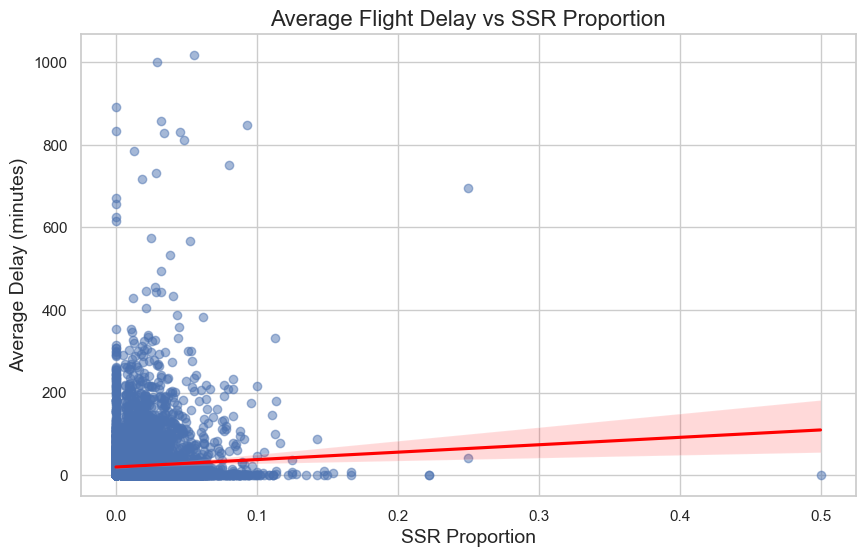

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)
print("✅ After merging PNR Flight + PNR Remark Data:", merge1.shape)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)
print("✅ After merging with Flight Level Data:", final_df.shape)

# -------------------------
# Step 3 - Compute departure delay per passenger
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60

# Step 3b - Clip negative delays to zero
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean')
).reset_index()

# -------------------------
# Step 7 - Compute SSR proportion
# -------------------------
flight_summary['ssr_proportion'] = flight_summary['ssr_count'] / flight_summary['total_passengers']
flight_summary = flight_summary[flight_summary['total_passengers'] > 0]

# -------------------------
# Step 8 - View flight-level summary
# -------------------------
print("✅ Flight-level SSR summary:")
print(flight_summary.head(10))

# -------------------------
# Step 9 - Correlation analysis
# -------------------------
corr_matrix = flight_summary[['ssr_proportion', 'avg_delay', 'avg_load_factor']].corr()
print("✅ Correlation matrix:")
print(corr_matrix)

# -------------------------
# Step 10 - Prepare data for regression
# -------------------------
# Drop rows with NaN or infinite values in predictors or target
regression_df = flight_summary[['avg_delay', 'ssr_proportion', 'avg_load_factor']].copy()
regression_df = regression_df.replace([np.inf, -np.inf], np.nan).dropna()

y = regression_df['avg_delay']
X = regression_df[['ssr_proportion','avg_load_factor']]
X = sm.add_constant(X)

# Run regression
model = sm.OLS(y, X).fit()
print("✅ Regression results (avg_delay ~ SSR proportion + load factor):")
print(model.summary())

# -------------------------
# Step 11 - Scatter plot of SSR proportion vs Avg Delay
# -------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(
    x='ssr_proportion',
    y='avg_delay',
    data=flight_summary,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('Average Flight Delay vs SSR Proportion', fontsize=16)
plt.xlabel('SSR Proportion', fontsize=14)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.show()


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (4502, 15)
✅ After merging PNR Flight + PNR Remark Data: (688837, 13)
✅ After merging with Flight Level Data: (691805, 16)
✅ Flight-level SSR summary:
   flight_number scheduled_departure_date_local  ssr_count  total_passengers  \
0              3                     2025-08-01          2               177   
1              3                     2025-08-02          2               183   
2              3                     2025-08-03          3               199   
3              3                     2025-08-04          3               199   
4              3                     2025-08-05          5               180   
5              3                     2025-08-06          4               175   
6              3                     2025-08-07          2               184   
7              3                     2025-08-08          4               201   
8              3                     2025-08-09 

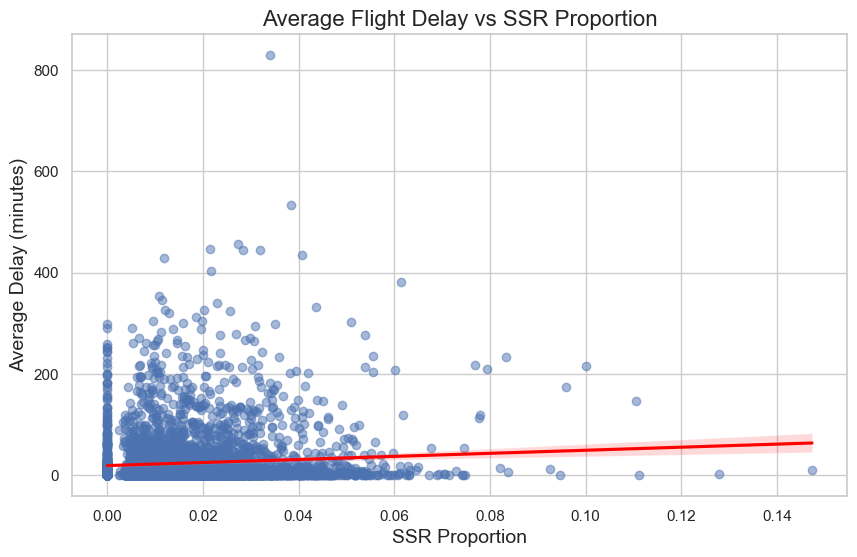

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
flight = flight[flight['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)
print("✅ After merging PNR Flight + PNR Remark Data:", merge1.shape)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)
print("✅ After merging with Flight Level Data:", final_df.shape)

# -------------------------
# Step 3 - Compute departure delay per passenger
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60

# Step 3b - Clip negative delays to zero
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean')
).reset_index()

# -------------------------
# Step 7 - Compute SSR proportion
# -------------------------
flight_summary['ssr_proportion'] = flight_summary['ssr_count'] / flight_summary['total_passengers']
flight_summary = flight_summary[flight_summary['total_passengers'] > 0]

# -------------------------
# Step 8 - View flight-level summary
# -------------------------
print("✅ Flight-level SSR summary:")
print(flight_summary.head(10))

# -------------------------
# Step 9 - Correlation analysis
# -------------------------
corr_matrix = flight_summary[['ssr_proportion', 'avg_delay', 'avg_load_factor']].corr()
print("✅ Correlation matrix:")
print(corr_matrix)

# -------------------------
# Step 10 - Prepare data for regression
# -------------------------
# Drop rows with NaN or infinite values in predictors or target
regression_df = flight_summary[['avg_delay', 'ssr_proportion', 'avg_load_factor']].copy()
regression_df = regression_df.replace([np.inf, -np.inf], np.nan).dropna()

y = regression_df['avg_delay']
X = regression_df[['ssr_proportion','avg_load_factor']]
X = sm.add_constant(X)

# Run regression
model = sm.OLS(y, X).fit()
print("✅ Regression results (avg_delay ~ SSR proportion + load factor):")
print(model.summary())

# -------------------------
# Step 11 - Scatter plot of SSR proportion vs Avg Delay
# -------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(
    x='ssr_proportion',
    y='avg_delay',
    data=flight_summary,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('Average Flight Delay vs SSR Proportion', fontsize=16)
plt.xlabel('SSR Proportion', fontsize=14)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.show()


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (4502, 15)
✅ After merging PNR Flight + PNR Remark Data: (688837, 13)
✅ After merging with Flight Level Data: (691805, 16)
✅ Flight-level SSR summary:
   flight_number scheduled_departure_date_local  ssr_count  total_passengers  \
0              3                     2025-08-01          2               177   
1              3                     2025-08-02          2               183   
2              3                     2025-08-03          3               199   
3              3                     2025-08-04          3               199   
4              3                     2025-08-05          5               180   
5              3                     2025-08-06          4               175   
6              3                     2025-08-07          2               184   
7              3                     2025-08-08          4               201   
8              3                     2025-08-09 

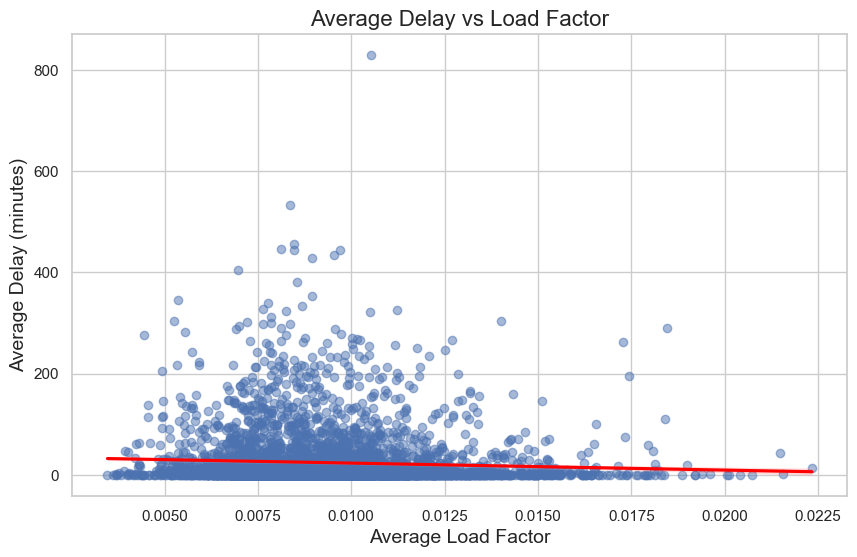

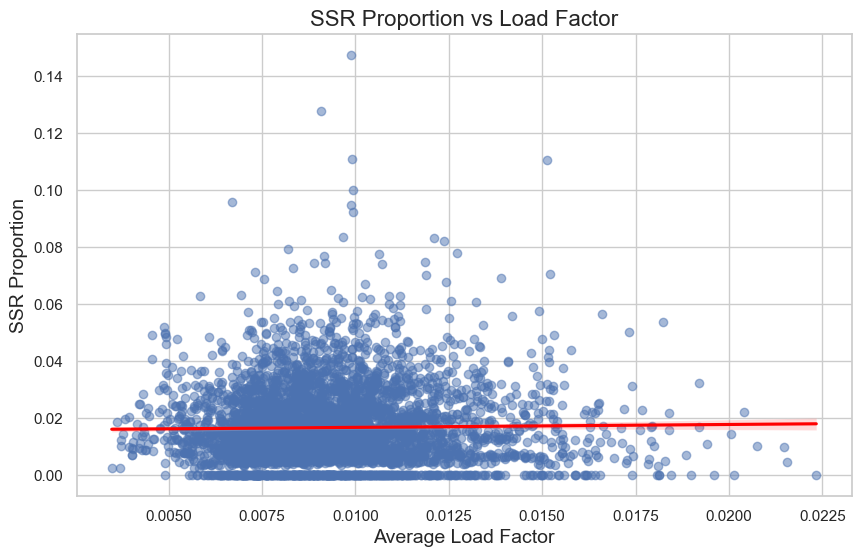

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')

# Filter for company_id = 'UA'
flight = flight[flight['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)
print("✅ After merging PNR Flight + PNR Remark Data:", merge1.shape)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local','total_seats']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)
print("✅ After merging with Flight Level Data:", final_df.shape)

# -------------------------
# Step 3 - Compute departure delay per passenger
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)  # negative delays → 0

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean')
).reset_index()

# -------------------------
# Step 7 - Compute SSR proportion
# -------------------------
flight_summary['ssr_proportion'] = flight_summary['ssr_count'] / flight_summary['total_passengers']
flight_summary = flight_summary[flight_summary['total_passengers'] > 0]

# -------------------------
# Step 8 - View flight-level summary
# -------------------------
print("✅ Flight-level SSR summary:")
print(flight_summary.head(10))

# -------------------------
# Step 9 - Correlation analysis
# -------------------------
corr_matrix = flight_summary[['avg_load_factor', 'avg_delay', 'ssr_proportion']].corr()
print("✅ Correlation matrix:")
print(corr_matrix)

# -------------------------
# Step 10 - Scatter plots
# -------------------------
sns.set(style="whitegrid")

# Load factor vs avg_delay
plt.figure(figsize=(10,6))
sns.regplot(
    x='avg_load_factor',
    y='avg_delay',
    data=flight_summary,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('Average Delay vs Load Factor', fontsize=16)
plt.xlabel('Average Load Factor', fontsize=14)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.show()

# Load factor vs ssr_proportion
plt.figure(figsize=(10,6))
sns.regplot(
    x='avg_load_factor',
    y='ssr_proportion',
    data=flight_summary,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('SSR Proportion vs Load Factor', fontsize=16)
plt.xlabel('Average Load Factor', fontsize=14)
plt.ylabel('SSR Proportion', fontsize=14)
plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
flight = flight[flight['company_id'] == 'UA']  # Filter only UA

bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv', usecols=['company_id', 'flight_number', 'bag_type'])
bags = bags[bags['company_id'] == 'UA']  # Filter UA only

# -------------------------
# Step 2 - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 3 - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 4 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 5 - Compute load factor
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 6 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 7 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    scheduled_ground_time=('scheduled_ground_time_minutes', 'first'),
    min_turn=('minimum_turn_minutes', 'first')
).reset_index()

# SSR proportion
flight_summary['ssr_proportion'] = flight_summary['ssr_count'] / flight_summary['total_passengers']
flight_summary = flight_summary[flight_summary['total_passengers'] > 0]

# -------------------------
# Step 8 - Ground time risk
# -------------------------
flight_summary['ground_vs_min_turn'] = flight_summary['scheduled_ground_time'] - flight_summary['min_turn']

# -------------------------
# Step 9 - Baggage volume (transfer vs checked ratio)
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number', 'bag_type']).size().unstack(fill_value=0)
for col in ['origin', 'transfer', 'hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0
bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()
bag_counts['transfer_to_checked_ratio'] = bag_counts['transfer_to_checked_ratio'].round(2)

# Merge with flight_summary
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# Fill NaN baggage ratios with 0
flight_summary['transfer_to_checked_ratio'] = flight_summary['transfer_to_checked_ratio'].fillna(0)

# -------------------------
# Step 10 - Normalize all factors (0-1 scale)
# -------------------------
scaler = MinMaxScaler()

flight_summary['load_norm'] = scaler.fit_transform(flight_summary[['avg_load_factor']])
flight_summary['ssr_norm'] = scaler.fit_transform(flight_summary[['ssr_proportion']])
flight_summary['delay_norm'] = scaler.fit_transform(flight_summary[['avg_delay']])
flight_summary['ground_norm'] = 1 - scaler.fit_transform(flight_summary[['ground_vs_min_turn']])
flight_summary['bag_norm'] = scaler.fit_transform(flight_summary[['transfer_to_checked_ratio']])

# -------------------------
# Step 11 - Compute composite difficulty score
# -------------------------
flight_summary['difficulty_score'] = (
    0.25 * flight_summary['load_norm'] +
    0.25 * flight_summary['ssr_norm'] +
    0.2  * flight_summary['delay_norm'] +
    0.15 * flight_summary['ground_norm'] +
    0.15 * flight_summary['bag_norm']
)

# -------------------------
# Step 12 - Rank and classify flights daily
# -------------------------
flight_summary['rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'] \
                                       .rank(method='first', ascending=False)

def classify(rank, total):
    if rank <= total*0.33:
        return 'Difficult'
    elif rank <= total*0.66:
        return 'Medium'
    else:
        return 'Easy'

flight_summary['difficulty_class'] = flight_summary.groupby('scheduled_departure_date_local')['rank'] \
    .transform(lambda x: [classify(r, len(x)) for r in x])

# -------------------------
# Step 13 - Highlight top contributing factor
# -------------------------
factor_cols = ['load_norm','ssr_norm','delay_norm','ground_norm','bag_norm']
flight_summary['top_factor'] = flight_summary[factor_cols].idxmax(axis=1)

# -------------------------
# Step 14 - View results
# -------------------------
print(flight_summary[['flight_number','scheduled_departure_date_local',
                      'difficulty_score','difficulty_class','top_factor']].head(20))


    flight_number scheduled_departure_date_local  difficulty_score  \
0               3                     2025-08-01          0.255848   
1               3                     2025-08-02          0.265879   
2               3                     2025-08-03          0.255665   
3               3                     2025-08-04          0.275420   
4               3                     2025-08-05          0.252469   
5               3                     2025-08-06          0.267831   
6               3                     2025-08-07          0.271444   
7               3                     2025-08-08          0.271700   
8               3                     2025-08-09          0.257320   
9               3                     2025-08-10          0.241615   
10              3                     2025-08-11          0.251546   
11              3                     2025-08-12          0.279475   
12              3                     2025-08-13          0.242512   
13              3   

In [23]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv')

# Filter United Airlines only
flight = flight[flight['company_id'] == 'UA']
bags = bags[bags['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)
print("Bag Level:", bags.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 3 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    ground_time=('scheduled_ground_time_minutes','first'),
    min_turn=('minimum_turn_minutes','first')
).reset_index()

# -------------------------
# Step 7 - Ground time metric
# -------------------------
flight_summary['ground_buffer'] = flight_summary['ground_time'] - flight_summary['min_turn']

# -------------------------
# Step 8 - Baggage ratio per flight
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number','bag_type']).size().unstack(fill_value=0)

for col in ['origin','transfer','hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0

bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()

# -------------------------
# Step 9 - Merge baggage data into flight_summary
# -------------------------
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# -------------------------
# Step 10 - Handle missing and normalize data
# -------------------------
for col in ['avg_load_factor','ssr_count','avg_delay','ground_buffer','transfer_to_checked_ratio']:
    flight_summary[col] = flight_summary[col].fillna(flight_summary[col].median())

# Normalize
flight_summary['load_norm']  = (flight_summary['avg_load_factor'] - flight_summary['avg_load_factor'].min()) / (flight_summary['avg_load_factor'].max() - flight_summary['avg_load_factor'].min())
flight_summary['ssr_norm']   = (flight_summary['ssr_count'] - flight_summary['ssr_count'].min()) / (flight_summary['ssr_count'].max() - flight_summary['ssr_count'].min())
flight_summary['delay_norm'] = (flight_summary['avg_delay'] - flight_summary['avg_delay'].min()) / (flight_summary['avg_delay'].max() - flight_summary['avg_delay'].min())
flight_summary['ground_norm']= 1 - ((flight_summary['ground_buffer'] - flight_summary['ground_buffer'].min()) / (flight_summary['ground_buffer'].max() - flight_summary['ground_buffer'].min()))
flight_summary['bag_norm']   = (flight_summary['transfer_to_checked_ratio'] - flight_summary['transfer_to_checked_ratio'].min()) / (flight_summary['transfer_to_checked_ratio'].max() - flight_summary['transfer_to_checked_ratio'].min())

# -------------------------
# Step 11 - Auto-generate dynamic weights
# -------------------------
corrs = {
    'load_norm': abs(flight_summary['load_norm'].corr(flight_summary['avg_delay'])),
    'ssr_norm': abs(flight_summary['ssr_norm'].corr(flight_summary['avg_delay'])),
    'delay_norm': abs(flight_summary['delay_norm'].corr(flight_summary['avg_delay'])),
    'ground_norm': abs(flight_summary['ground_norm'].corr(flight_summary['avg_delay'])),
    'bag_norm': abs(flight_summary['bag_norm'].corr(flight_summary['avg_delay']))
}
corr_df = pd.DataFrame(list(corrs.items()), columns=['factor','corr_value'])
corr_df['weight'] = corr_df['corr_value'] / corr_df['corr_value'].sum()
print("\n📊 Auto-generated Weights:")
print(corr_df)

weights = dict(zip(corr_df['factor'], corr_df['weight']))

# -------------------------
# Step 12 - Compute Difficulty Score
# -------------------------
flight_summary['difficulty_score'] = (
    weights['load_norm']  * flight_summary['load_norm'] +
    weights['ssr_norm']   * flight_summary['ssr_norm'] +
    weights['delay_norm'] * flight_summary['delay_norm'] +
    weights['ground_norm']* flight_summary['ground_norm'] +
    weights['bag_norm']   * flight_summary['bag_norm']
)

# -------------------------
# Step 13 - Daily ranking & classification
# -------------------------
flight_summary['difficulty_rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'].rank(ascending=False)
flight_summary['difficulty_category'] = pd.qcut(
    flight_summary['difficulty_rank'],
    q=3,
    labels=['Easy','Medium','Difficult']
)

# -------------------------
# Step 14 - Final output
# -------------------------
print("\n✅ Final Difficulty Scoring Sample:")
print(flight_summary[['flight_number','scheduled_departure_date_local','difficulty_score','difficulty_category']].head(10))


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (4502, 15)
Bag Level: (292669, 8)

📊 Auto-generated Weights:
        factor  corr_value    weight
0    load_norm    0.035700  0.027317
1     ssr_norm    0.121881  0.093262
2   delay_norm    1.000000  0.765187
3  ground_norm    0.010649  0.008148
4     bag_norm    0.138641  0.106086

✅ Final Difficulty Scoring Sample:
   flight_number scheduled_departure_date_local  difficulty_score  \
0              3                     2025-08-01          0.028967   
1              3                     2025-08-02          0.033670   
2              3                     2025-08-03          0.037056   
3              3                     2025-08-04          0.041904   
4              3                     2025-08-05          0.046638   
5              3                     2025-08-06          0.057871   
6              3                     2025-08-07          0.112271   
7              3                     2025-08-08 

In [24]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv')

# Filter for United Airlines only
flight = flight[flight['company_id'] == 'UA']
bags = bags[bags['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)
print("Bag Level:", bags.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 3 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    ground_time=('scheduled_ground_time_minutes','first'),
    min_turn=('minimum_turn_minutes','first')
).reset_index()

# -------------------------
# Step 7 - Ground time metric
# -------------------------
flight_summary['ground_buffer'] = flight_summary['ground_time'] - flight_summary['min_turn']

# -------------------------
# Step 8 - Baggage ratio per flight
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number','bag_type']).size().unstack(fill_value=0)

for col in ['origin','transfer','hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0

bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()

# -------------------------
# Step 9 - Merge baggage data into flight_summary
# -------------------------
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# -------------------------
# Step 10 - Handle missing and normalize data
# -------------------------
for col in ['avg_load_factor','ssr_count','avg_delay','ground_buffer','transfer_to_checked_ratio']:
    flight_summary[col] = flight_summary[col].fillna(flight_summary[col].median())

# Normalize
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

flight_summary['load_norm']   = normalize(flight_summary['avg_load_factor'])
flight_summary['ssr_norm']    = normalize(flight_summary['ssr_count'])
flight_summary['delay_norm']  = normalize(flight_summary['avg_delay'])
flight_summary['ground_norm'] = 1 - normalize(flight_summary['ground_buffer'])
flight_summary['bag_norm']    = normalize(flight_summary['transfer_to_checked_ratio'])

# -------------------------
# Step 11 - Auto-generate dynamic weights
# -------------------------
corrs = {
    'load_norm': abs(flight_summary['load_norm'].corr(flight_summary['avg_delay'])),
    'ssr_norm': abs(flight_summary['ssr_norm'].corr(flight_summary['avg_delay'])),
    'delay_norm': abs(flight_summary['delay_norm'].corr(flight_summary['avg_delay'])),
    'ground_norm': abs(flight_summary['ground_norm'].corr(flight_summary['avg_delay'])),
    'bag_norm': abs(flight_summary['bag_norm'].corr(flight_summary['avg_delay']))
}
corr_df = pd.DataFrame(list(corrs.items()), columns=['factor','corr_value'])
corr_df['weight'] = corr_df['corr_value'] / corr_df['corr_value'].sum()
print("\n📊 Auto-generated Weights:")
print(corr_df)

weights = dict(zip(corr_df['factor'], corr_df['weight']))

# -------------------------
# Step 12 - Compute Difficulty Score
# -------------------------
flight_summary['difficulty_score'] = (
    weights['load_norm']  * flight_summary['load_norm'] +
    weights['ssr_norm']   * flight_summary['ssr_norm'] +
    weights['delay_norm'] * flight_summary['delay_norm'] +
    weights['ground_norm']* flight_summary['ground_norm'] +
    weights['bag_norm']   * flight_summary['bag_norm']
)

# -------------------------
# Step 13 - Daily ranking & classification (fixed)
# -------------------------
# Rank so that higher scores = more difficult
flight_summary['difficulty_rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'] \
                                                 .rank(method='dense', ascending=False)

# Percentile rank for classification
flight_summary['rank_percentile'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_rank'] \
                                                 .rank(pct=True)

def classify_difficulty(p):
    if p <= 0.33:
        return 'Difficult'
    elif p <= 0.66:
        return 'Medium'
    else:
        return 'Easy'

flight_summary['difficulty_category'] = flight_summary['rank_percentile'].apply(classify_difficulty)

# -------------------------
# Step 14 - Final output
# -------------------------
print("\n✅ Final Difficulty Scoring Sample:")
print(flight_summary[['flight_number','scheduled_departure_date_local','difficulty_score','difficulty_category']].head(10))


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (4502, 15)
Bag Level: (292669, 8)

📊 Auto-generated Weights:
        factor  corr_value    weight
0    load_norm    0.035700  0.027317
1     ssr_norm    0.121881  0.093262
2   delay_norm    1.000000  0.765187
3  ground_norm    0.010649  0.008148
4     bag_norm    0.138641  0.106086

✅ Final Difficulty Scoring Sample:
   flight_number scheduled_departure_date_local  difficulty_score  \
0              3                     2025-08-01          0.028967   
1              3                     2025-08-02          0.033670   
2              3                     2025-08-03          0.037056   
3              3                     2025-08-04          0.041904   
4              3                     2025-08-05          0.046638   
5              3                     2025-08-06          0.057871   
6              3                     2025-08-07          0.112271   
7              3                     2025-08-08 

In [25]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv')

# Filter for United Airlines only
flight = flight[flight['company_id'] == 'UA']
bags = bags[bags['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)
print("Bag Level:", bags.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 3 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    ground_time=('scheduled_ground_time_minutes','first'),
    min_turn=('minimum_turn_minutes','first')
).reset_index()

# -------------------------
# Step 7 - Ground time metric
# -------------------------
flight_summary['ground_buffer'] = flight_summary['ground_time'] - flight_summary['min_turn']

# -------------------------
# Step 8 - Baggage ratio per flight
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number','bag_type']).size().unstack(fill_value=0)

for col in ['origin','transfer','hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0

bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()

# -------------------------
# Step 9 - Merge baggage data into flight_summary
# -------------------------
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# -------------------------
# Step 10 - Handle missing and normalize data
# -------------------------
for col in ['avg_load_factor','ssr_count','avg_delay','ground_buffer','transfer_to_checked_ratio']:
    flight_summary[col] = flight_summary[col].fillna(flight_summary[col].median())

# Normalize
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

flight_summary['load_norm']   = normalize(flight_summary['avg_load_factor'])
flight_summary['ssr_norm']    = normalize(flight_summary['ssr_count'])
flight_summary['delay_norm']  = normalize(flight_summary['avg_delay'])
flight_summary['ground_norm'] = 1 - normalize(flight_summary['ground_buffer'])
flight_summary['bag_norm']    = normalize(flight_summary['transfer_to_checked_ratio'])

# -------------------------
# Step 11 - Auto-generate dynamic weights
# -------------------------
corrs = {
    'load_norm': abs(flight_summary['load_norm'].corr(flight_summary['avg_delay'])),
    'ssr_norm': abs(flight_summary['ssr_norm'].corr(flight_summary['avg_delay'])),
    'delay_norm': abs(flight_summary['delay_norm'].corr(flight_summary['avg_delay'])),
    'ground_norm': abs(flight_summary['ground_norm'].corr(flight_summary['avg_delay'])),
    'bag_norm': abs(flight_summary['bag_norm'].corr(flight_summary['avg_delay']))
}
corr_df = pd.DataFrame(list(corrs.items()), columns=['factor','corr_value'])
corr_df['weight'] = corr_df['corr_value'] / corr_df['corr_value'].sum()
print("\n📊 Auto-generated Weights:")
print(corr_df)

weights = dict(zip(corr_df['factor'], corr_df['weight']))

# -------------------------
# Step 12 - Compute Difficulty Score
# -------------------------
flight_summary['difficulty_score'] = (
    weights['load_norm']  * flight_summary['load_norm'] +
    weights['ssr_norm']   * flight_summary['ssr_norm'] +
    weights['delay_norm'] * flight_summary['delay_norm'] +
    weights['ground_norm']* flight_summary['ground_norm'] +
    weights['bag_norm']   * flight_summary['bag_norm']
)

# -------------------------
# Step 13 - Daily ranking & classification (fixed)
# -------------------------
# Rank so that higher scores = more difficult
flight_summary['difficulty_rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'] \
                                                 .rank(method='dense', ascending=False)

# Percentile rank for classification
flight_summary['rank_percentile'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_rank'] \
                                                 .rank(pct=True)

def classify_difficulty(p):
    if p <= 0.33:
        return 'Difficult'
    elif p <= 0.66:
        return 'Medium'
    else:
        return 'Easy'

flight_summary['difficulty_category'] = flight_summary['rank_percentile'].apply(classify_difficulty)

# -------------------------
# Step 14 - Final output
# -------------------------
print("\n✅ Final Difficulty Scoring Sample:")
print(flight_summary[['flight_number','scheduled_departure_date_local','difficulty_score','difficulty_category']])


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (4502, 15)
Bag Level: (292669, 8)

📊 Auto-generated Weights:
        factor  corr_value    weight
0    load_norm    0.035700  0.027317
1     ssr_norm    0.121881  0.093262
2   delay_norm    1.000000  0.765187
3  ground_norm    0.010649  0.008148
4     bag_norm    0.138641  0.106086

✅ Final Difficulty Scoring Sample:
      flight_number scheduled_departure_date_local  difficulty_score  \
0                 3                     2025-08-01          0.028967   
1                 3                     2025-08-02          0.033670   
2                 3                     2025-08-03          0.037056   
3                 3                     2025-08-04          0.041904   
4                 3                     2025-08-05          0.046638   
...             ...                            ...               ...   
8066           6004                     2025-08-05          0.028704   
8067           6004     

In [26]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv')

# Filter United Airlines only
flight = flight[flight['company_id'] == 'UA']
bags = bags[bags['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)
print("Bag Level:", bags.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 3 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    ground_time=('scheduled_ground_time_minutes','first'),
    min_turn=('minimum_turn_minutes','first')
).reset_index()

# -------------------------
# Step 7 - Ground time metric
# -------------------------
flight_summary['ground_buffer'] = flight_summary['ground_time'] - flight_summary['min_turn']

# -------------------------
# Step 8 - Baggage ratio per flight
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number','bag_type']).size().unstack(fill_value=0)

for col in ['origin','transfer','hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0

bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()

# -------------------------
# Step 9 - Merge baggage data into flight_summary
# -------------------------
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# -------------------------
# Step 10 - Handle missing and normalize data
# -------------------------
for col in ['avg_load_factor','ssr_count','avg_delay','ground_buffer','transfer_to_checked_ratio']:
    flight_summary[col] = flight_summary[col].fillna(flight_summary[col].median())

# Normalize
flight_summary['load_norm']  = (flight_summary['avg_load_factor'] - flight_summary['avg_load_factor'].min()) / (flight_summary['avg_load_factor'].max() - flight_summary['avg_load_factor'].min())
flight_summary['ssr_norm']   = (flight_summary['ssr_count'] - flight_summary['ssr_count'].min()) / (flight_summary['ssr_count'].max() - flight_summary['ssr_count'].min())
flight_summary['delay_norm'] = (flight_summary['avg_delay'] - flight_summary['avg_delay'].min()) / (flight_summary['avg_delay'].max() - flight_summary['avg_delay'].min())
flight_summary['ground_norm']= 1 - ((flight_summary['ground_buffer'] - flight_summary['ground_buffer'].min()) / (flight_summary['ground_buffer'].max() - flight_summary['ground_buffer'].min()))
flight_summary['bag_norm']   = (flight_summary['transfer_to_checked_ratio'] - flight_summary['transfer_to_checked_ratio'].min()) / (flight_summary['transfer_to_checked_ratio'].max() - flight_summary['transfer_to_checked_ratio'].min())

# -------------------------
# Step 11 - Auto-generate dynamic weights
# -------------------------
corrs = {
    'load_norm': abs(flight_summary['load_norm'].corr(flight_summary['avg_delay'])),
    'ssr_norm': abs(flight_summary['ssr_norm'].corr(flight_summary['avg_delay'])),
    'delay_norm': abs(flight_summary['delay_norm'].corr(flight_summary['avg_delay'])),
    'ground_norm': abs(flight_summary['ground_norm'].corr(flight_summary['avg_delay'])),
    'bag_norm': abs(flight_summary['bag_norm'].corr(flight_summary['avg_delay']))
}
corr_df = pd.DataFrame(list(corrs.items()), columns=['factor','corr_value'])
corr_df['weight'] = corr_df['corr_value'] / corr_df['corr_value'].sum()
print("\n📊 Auto-generated Weights:")
print(corr_df)

weights = dict(zip(corr_df['factor'], corr_df['weight']))

# -------------------------
# Step 12 - Compute Difficulty Score
# -------------------------
flight_summary['difficulty_score'] = (
    weights['load_norm']  * flight_summary['load_norm'] +
    weights['ssr_norm']   * flight_summary['ssr_norm'] +
    weights['delay_norm'] * flight_summary['delay_norm'] +
    weights['ground_norm']* flight_summary['ground_norm'] +
    weights['bag_norm']   * flight_summary['bag_norm']
)

# -------------------------
# Step 13 - Daily ranking & classification
# -------------------------
flight_summary['difficulty_rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'].rank(ascending=False)
flight_summary['difficulty_category'] = pd.qcut(
    flight_summary['difficulty_rank'],
    q=3,
    labels=['Easy','Medium','Difficult']
)

# -------------------------
# Step 14 - Final output
# -------------------------
print("\n✅ Final Difficulty Scoring Sample:")
print(flight_summary[['flight_number','scheduled_departure_date_local','difficulty_score','difficulty_category']].head(10))

# -------------------------
# Step 15 - Save to CSV
# -------------------------
output_path = r"C:\Users\seema\United-Airlines-CaseStudy\Data\processed\flight_difficulty_summary.csv"

flight_summary.to_csv(output_path, index=False)
print(f"\n📁 Difficulty summary saved successfully at:\n{output_path}")


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (4502, 15)
Bag Level: (292669, 8)

📊 Auto-generated Weights:
        factor  corr_value    weight
0    load_norm    0.035700  0.027317
1     ssr_norm    0.121881  0.093262
2   delay_norm    1.000000  0.765187
3  ground_norm    0.010649  0.008148
4     bag_norm    0.138641  0.106086

✅ Final Difficulty Scoring Sample:
   flight_number scheduled_departure_date_local  difficulty_score  \
0              3                     2025-08-01          0.028967   
1              3                     2025-08-02          0.033670   
2              3                     2025-08-03          0.037056   
3              3                     2025-08-04          0.041904   
4              3                     2025-08-05          0.046638   
5              3                     2025-08-06          0.057871   
6              3                     2025-08-07          0.112271   
7              3                     2025-08-08 

OSError: Cannot save file into a non-existent directory: 'C:\Users\seema\United-Airlines-CaseStudy\Data\processed'

In [27]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv')

# Filter United Airlines only
flight = flight[flight['company_id'] == 'UA']
bags = bags[bags['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)
print("Bag Level:", bags.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 3 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    ground_time=('scheduled_ground_time_minutes','first'),
    min_turn=('minimum_turn_minutes','first')
).reset_index()

# -------------------------
# Step 7 - Ground time metric
# -------------------------
flight_summary['ground_buffer'] = flight_summary['ground_time'] - flight_summary['min_turn']

# -------------------------
# Step 8 - Baggage ratio per flight
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number','bag_type']).size().unstack(fill_value=0)

for col in ['origin','transfer','hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0

bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()

# -------------------------
# Step 9 - Merge baggage data into flight_summary
# -------------------------
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# -------------------------
# Step 10 - Handle missing and normalize data
# -------------------------
for col in ['avg_load_factor','ssr_count','avg_delay','ground_buffer','transfer_to_checked_ratio']:
    flight_summary[col] = flight_summary[col].fillna(flight_summary[col].median())

# Normalize
flight_summary['load_norm']  = (flight_summary['avg_load_factor'] - flight_summary['avg_load_factor'].min()) / (flight_summary['avg_load_factor'].max() - flight_summary['avg_load_factor'].min())
flight_summary['ssr_norm']   = (flight_summary['ssr_count'] - flight_summary['ssr_count'].min()) / (flight_summary['ssr_count'].max() - flight_summary['ssr_count'].min())
flight_summary['delay_norm'] = (flight_summary['avg_delay'] - flight_summary['avg_delay'].min()) / (flight_summary['avg_delay'].max() - flight_summary['avg_delay'].min())
flight_summary['ground_norm']= 1 - ((flight_summary['ground_buffer'] - flight_summary['ground_buffer'].min()) / (flight_summary['ground_buffer'].max() - flight_summary['ground_buffer'].min()))
flight_summary['bag_norm']   = (flight_summary['transfer_to_checked_ratio'] - flight_summary['transfer_to_checked_ratio'].min()) / (flight_summary['transfer_to_checked_ratio'].max() - flight_summary['transfer_to_checked_ratio'].min())

# -------------------------
# Step 11 - Auto-generate dynamic weights
# -------------------------
corrs = {
    'load_norm': abs(flight_summary['load_norm'].corr(flight_summary['avg_delay'])),
    'ssr_norm': abs(flight_summary['ssr_norm'].corr(flight_summary['avg_delay'])),
    'delay_norm': abs(flight_summary['delay_norm'].corr(flight_summary['avg_delay'])),
    'ground_norm': abs(flight_summary['ground_norm'].corr(flight_summary['avg_delay'])),
    'bag_norm': abs(flight_summary['bag_norm'].corr(flight_summary['avg_delay']))
}
corr_df = pd.DataFrame(list(corrs.items()), columns=['factor','corr_value'])
corr_df['weight'] = corr_df['corr_value'] / corr_df['corr_value'].sum()
print("\n📊 Auto-generated Weights:")
print(corr_df)

weights = dict(zip(corr_df['factor'], corr_df['weight']))

# -------------------------
# Step 12 - Compute Difficulty Score
# -------------------------
flight_summary['difficulty_score'] = (
    weights['load_norm']  * flight_summary['load_norm'] +
    weights['ssr_norm']   * flight_summary['ssr_norm'] +
    weights['delay_norm'] * flight_summary['delay_norm'] +
    weights['ground_norm']* flight_summary['ground_norm'] +
    weights['bag_norm']   * flight_summary['bag_norm']
)

# -------------------------
# Step 13 - Daily ranking & classification
# -------------------------
flight_summary['difficulty_rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'].rank(ascending=False)
flight_summary['difficulty_category'] = pd.qcut(
    flight_summary['difficulty_rank'],
    q=3,
    labels=['Easy','Medium','Difficult']
)

# -------------------------
# Step 14 - Final output
# -------------------------
print("\n✅ Final Difficulty Scoring Sample:")
print(flight_summary[['flight_number','scheduled_departure_date_local','difficulty_score','difficulty_category']].head(10))
import os

# -------------------------
# Step 15 - Save to CSV
# -------------------------
output_dir = r"C:\Users\seema\United-Airlines-CaseStudy\Data\processed"
os.makedirs(output_dir, exist_ok=True)  # ✅ Creates the folder if not exists

output_path = os.path.join(output_dir, "flight_difficulty_summary.csv")
flight_summary.to_csv(output_path, index=False)

print(f"\n📁 Difficulty summary saved successfully at:\n{output_path}")


✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (4502, 15)
Bag Level: (292669, 8)

📊 Auto-generated Weights:
        factor  corr_value    weight
0    load_norm    0.035700  0.027317
1     ssr_norm    0.121881  0.093262
2   delay_norm    1.000000  0.765187
3  ground_norm    0.010649  0.008148
4     bag_norm    0.138641  0.106086

✅ Final Difficulty Scoring Sample:
   flight_number scheduled_departure_date_local  difficulty_score  \
0              3                     2025-08-01          0.028967   
1              3                     2025-08-02          0.033670   
2              3                     2025-08-03          0.037056   
3              3                     2025-08-04          0.041904   
4              3                     2025-08-05          0.046638   
5              3                     2025-08-06          0.057871   
6              3                     2025-08-07          0.112271   
7              3                     2025-08-08 

In [28]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv')

# Filter for United Airlines only
flight = flight[flight['company_id'] == 'UA']
bags = bags[bags['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)
print("Bag Level:", bags.shape)
 Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 3 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)
 Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    ground_time=('scheduled_ground_time_minutes','first'),
    min_turn=('minimum_turn_minutes','first')
).reset_index()

# -------------------------
# Step 7 - Ground time metric
# -------------------------
flight_summary['ground_buffer'] = flight_summary['ground_time'] - flight_summary['min_turn']
 Step 8 - Baggage ratio per flight
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number','bag_type']).size().unstack(fill_value=0)

for col in ['origin','transfer','hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0

bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()
-------------------------
# Step 9 - Merge baggage data into flight_summary
# -------------------------
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# -------------------------
# Step 10 - Handle missing and normalize data
# -------------------------
for col in ['avg_load_factor','ssr_count','avg_delay','ground_buffer','transfer_to_checked_ratio']:
    flight_summary[col] = flight_summary[col].fillna(flight_summary[col].median())

# Normalize
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

flight_summary['load_norm']   = normalize(flight_summary['avg_load_factor'])
flight_summary['ssr_norm']    = normalize(flight_summary['ssr_count'])
flight_summary['delay_norm']  = normalize(flight_summary['avg_delay'])
flight_summary['ground_norm'] = 1 - normalize(flight_summary['ground_buffer'])
flight_summary['bag_norm']    = normalize(flight_summary['transfer_to_checked_ratio'])
# -------------------------
# Step 11 - Auto-generate dynamic weights
# -------------------------
corrs = {
    'load_norm': abs(flight_summary['load_norm'].corr(flight_summary['avg_delay'])),
    'ssr_norm': abs(flight_summary['ssr_norm'].corr(flight_summary['avg_delay'])),
    'delay_norm': abs(flight_summary['delay_norm'].corr(flight_summary['avg_delay'])),
    'ground_norm': abs(flight_summary['ground_norm'].corr(flight_summary['avg_delay'])),
    'bag_norm': abs(flight_summary['bag_norm'].corr(flight_summary['avg_delay']))
}
corr_df = pd.DataFrame(list(corrs.items()), columns=['factor','corr_value'])
corr_df['weight'] = corr_df['corr_value'] / corr_df['corr_value'].sum()
print("\n📊 Auto-generated Weights:")
print(corr_df)

weights = dict(zip(corr_df['factor'], corr_df['weight']))
# Step 12 - Compute Difficulty Score
# -------------------------
flight_summary['difficulty_score'] = (
    weights['load_norm']  * flight_summary['load_norm'] +
    weights['ssr_norm']   * flight_summary['ssr_norm'] +
    weights['delay_norm'] * flight_summary['delay_norm'] +
    weights['ground_norm']* flight_summary['ground_norm'] +
    weights['bag_norm']   * flight_summary['bag_norm']
)

# -------------------------
# Step 13 - Daily ranking & classification (fixed)
# -------------------------
# Rank so that higher scores = more difficult
flight_summary['difficulty_rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'] \
                                                 .rank(method='dense', ascending=False)

# Percentile rank for classification
flight_summary['rank_percentile'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_rank'] \
                                                 .rank(pct=True)
def classify_difficulty(p):
    if p <= 0.33:
        return 'Difficult'
    elif p <= 0.66:
        return 'Medium'
    else:
        return 'Easy'

flight_summary['difficulty_category'] = flight_summary['rank_percentile'].apply(classify_difficulty)

# -------------------------
# Step 14 - Final output
# -------------------------
print("\n✅ Final Difficulty Scoring Sample:")
print(flight_summary[['flight_number','scheduled_departure_date_local','difficulty_score','difficulty_category']])

IndentationError: unexpected indent (2483188629.py, line 26)

In [29]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv')

# Filter for United Airlines only
flight = flight[flight['company_id'] == 'UA']
bags = bags[bags['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)
print("Bag Level:", bags.shape)
 #Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 3 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)
 Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    ground_time=('scheduled_ground_time_minutes','first'),
    min_turn=('minimum_turn_minutes','first')
).reset_index()

# -------------------------
# Step 7 - Ground time metric
# -------------------------
flight_summary['ground_buffer'] = flight_summary['ground_time'] - flight_summary['min_turn']
 Step 8 - Baggage ratio per flight
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number','bag_type']).size().unstack(fill_value=0)

for col in ['origin','transfer','hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0

bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()
-------------------------
# Step 9 - Merge baggage data into flight_summary
# -------------------------
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# -------------------------
# Step 10 - Handle missing and normalize data
# -------------------------
for col in ['avg_load_factor','ssr_count','avg_delay','ground_buffer','transfer_to_checked_ratio']:
    flight_summary[col] = flight_summary[col].fillna(flight_summary[col].median())

# Normalize
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

flight_summary['load_norm']   = normalize(flight_summary['avg_load_factor'])
flight_summary['ssr_norm']    = normalize(flight_summary['ssr_count'])
flight_summary['delay_norm']  = normalize(flight_summary['avg_delay'])
flight_summary['ground_norm'] = 1 - normalize(flight_summary['ground_buffer'])
flight_summary['bag_norm']    = normalize(flight_summary['transfer_to_checked_ratio'])
# -------------------------
# Step 11 - Auto-generate dynamic weights
# -------------------------
corrs = {
    'load_norm': abs(flight_summary['load_norm'].corr(flight_summary['avg_delay'])),
    'ssr_norm': abs(flight_summary['ssr_norm'].corr(flight_summary['avg_delay'])),
    'delay_norm': abs(flight_summary['delay_norm'].corr(flight_summary['avg_delay'])),
    'ground_norm': abs(flight_summary['ground_norm'].corr(flight_summary['avg_delay'])),
    'bag_norm': abs(flight_summary['bag_norm'].corr(flight_summary['avg_delay']))
}
corr_df = pd.DataFrame(list(corrs.items()), columns=['factor','corr_value'])
corr_df['weight'] = corr_df['corr_value'] / corr_df['corr_value'].sum()
print("\n📊 Auto-generated Weights:")
print(corr_df)

weights = dict(zip(corr_df['factor'], corr_df['weight']))
# Step 12 - Compute Difficulty Score
# -------------------------
flight_summary['difficulty_score'] = (
    weights['load_norm']  * flight_summary['load_norm'] +
    weights['ssr_norm']   * flight_summary['ssr_norm'] +
    weights['delay_norm'] * flight_summary['delay_norm'] +
    weights['ground_norm']* flight_summary['ground_norm'] +
    weights['bag_norm']   * flight_summary['bag_norm']
)

# -------------------------
# Step 13 - Daily ranking & classification (fixed)
# -------------------------
# Rank so that higher scores = more difficult
flight_summary['difficulty_rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'] \
                                                 .rank(method='dense', ascending=False)

# Percentile rank for classification
flight_summary['rank_percentile'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_rank'] \
                                                 .rank(pct=True)
def classify_difficulty(p):
    if p <= 0.33:
        return 'Difficult'
    elif p <= 0.66:
        return 'Medium'
    else:
        return 'Easy'

flight_summary['difficulty_category'] = flight_summary['rank_percentile'].apply(classify_difficulty)

# -------------------------
# Step 14 - Final output
# -------------------------
print("\n✅ Final Difficulty Scoring Sample:")
print(flight_summary[['flight_number','scheduled_departure_date_local','difficulty_score','difficulty_category']])

IndentationError: unexpected indent (3619794268.py, line 74)

In [30]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv')

# Filter for United Airlines only
flight = flight[flight['company_id'] == 'UA']
bags = bags[bags['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)
print("Bag Level:", bags.shape)
 #Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 3 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)
 #Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    ground_time=('scheduled_ground_time_minutes','first'),
    min_turn=('minimum_turn_minutes','first')
).reset_index()

# -------------------------
# Step 7 - Ground time metric
# -------------------------
flight_summary['ground_buffer'] = flight_summary['ground_time'] - flight_summary['min_turn']
 Step 8 - Baggage ratio per flight
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number','bag_type']).size().unstack(fill_value=0)

for col in ['origin','transfer','hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0

bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()
-------------------------
# Step 9 - Merge baggage data into flight_summary
# -------------------------
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# -------------------------
# Step 10 - Handle missing and normalize data
# -------------------------
for col in ['avg_load_factor','ssr_count','avg_delay','ground_buffer','transfer_to_checked_ratio']:
    flight_summary[col] = flight_summary[col].fillna(flight_summary[col].median())

# Normalize
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

flight_summary['load_norm']   = normalize(flight_summary['avg_load_factor'])
flight_summary['ssr_norm']    = normalize(flight_summary['ssr_count'])
flight_summary['delay_norm']  = normalize(flight_summary['avg_delay'])
flight_summary['ground_norm'] = 1 - normalize(flight_summary['ground_buffer'])
flight_summary['bag_norm']    = normalize(flight_summary['transfer_to_checked_ratio'])
# -------------------------
# Step 11 - Auto-generate dynamic weights
# -------------------------
corrs = {
    'load_norm': abs(flight_summary['load_norm'].corr(flight_summary['avg_delay'])),
    'ssr_norm': abs(flight_summary['ssr_norm'].corr(flight_summary['avg_delay'])),
    'delay_norm': abs(flight_summary['delay_norm'].corr(flight_summary['avg_delay'])),
    'ground_norm': abs(flight_summary['ground_norm'].corr(flight_summary['avg_delay'])),
    'bag_norm': abs(flight_summary['bag_norm'].corr(flight_summary['avg_delay']))
}
corr_df = pd.DataFrame(list(corrs.items()), columns=['factor','corr_value'])
corr_df['weight'] = corr_df['corr_value'] / corr_df['corr_value'].sum()
print("\n📊 Auto-generated Weights:")
print(corr_df)

weights = dict(zip(corr_df['factor'], corr_df['weight']))
# Step 12 - Compute Difficulty Score
# -------------------------
flight_summary['difficulty_score'] = (
    weights['load_norm']  * flight_summary['load_norm'] +
    weights['ssr_norm']   * flight_summary['ssr_norm'] +
    weights['delay_norm'] * flight_summary['delay_norm'] +
    weights['ground_norm']* flight_summary['ground_norm'] +
    weights['bag_norm']   * flight_summary['bag_norm']
)

# -------------------------
# Step 13 - Daily ranking & classification (fixed)
# -------------------------
# Rank so that higher scores = more difficult
flight_summary['difficulty_rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'] \
                                                 .rank(method='dense', ascending=False)

# Percentile rank for classification
flight_summary['rank_percentile'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_rank'] \
                                                 .rank(pct=True)
def classify_difficulty(p):
    if p <= 0.33:
        return 'Difficult'
    elif p <= 0.66:
        return 'Medium'
    else:
        return 'Easy'

flight_summary['difficulty_category'] = flight_summary['rank_percentile'].apply(classify_difficulty)

# -------------------------
# Step 14 - Final output
# -------------------------
print("\n✅ Final Difficulty Scoring Sample:")
print(flight_summary[['flight_number','scheduled_departure_date_local','difficulty_score','difficulty_category']])

IndentationError: unexpected indent (2642235788.py, line 97)

In [31]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv')

# Filter for United Airlines only
flight = flight[flight['company_id'] == 'UA']
bags = bags[bags['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)
print("Bag Level:", bags.shape)
 #Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 3 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)
 #Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    ground_time=('scheduled_ground_time_minutes','first'),
    min_turn=('minimum_turn_minutes','first')
).reset_index()

# -------------------------
# Step 7 - Ground time metric
# -------------------------
flight_summary['ground_buffer'] = flight_summary['ground_time'] - flight_summary['min_turn']
 #Step 8 - Baggage ratio per flight
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number','bag_type']).size().unstack(fill_value=0)

for col in ['origin','transfer','hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0

bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()
-------------------------
# Step 9 - Merge baggage data into flight_summary
# -------------------------
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# -------------------------
# Step 10 - Handle missing and normalize data
# -------------------------
for col in ['avg_load_factor','ssr_count','avg_delay','ground_buffer','transfer_to_checked_ratio']:
    flight_summary[col] = flight_summary[col].fillna(flight_summary[col].median())

# Normalize
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

flight_summary['load_norm']   = normalize(flight_summary['avg_load_factor'])
flight_summary['ssr_norm']    = normalize(flight_summary['ssr_count'])
flight_summary['delay_norm']  = normalize(flight_summary['avg_delay'])
flight_summary['ground_norm'] = 1 - normalize(flight_summary['ground_buffer'])
flight_summary['bag_norm']    = normalize(flight_summary['transfer_to_checked_ratio'])
# -------------------------
# Step 11 - Auto-generate dynamic weights
# -------------------------
corrs = {
    'load_norm': abs(flight_summary['load_norm'].corr(flight_summary['avg_delay'])),
    'ssr_norm': abs(flight_summary['ssr_norm'].corr(flight_summary['avg_delay'])),
    'delay_norm': abs(flight_summary['delay_norm'].corr(flight_summary['avg_delay'])),
    'ground_norm': abs(flight_summary['ground_norm'].corr(flight_summary['avg_delay'])),
    'bag_norm': abs(flight_summary['bag_norm'].corr(flight_summary['avg_delay']))
}
corr_df = pd.DataFrame(list(corrs.items()), columns=['factor','corr_value'])
corr_df['weight'] = corr_df['corr_value'] / corr_df['corr_value'].sum()
print("\n📊 Auto-generated Weights:")
print(corr_df)

weights = dict(zip(corr_df['factor'], corr_df['weight']))
# Step 12 - Compute Difficulty Score
# -------------------------
flight_summary['difficulty_score'] = (
    weights['load_norm']  * flight_summary['load_norm'] +
    weights['ssr_norm']   * flight_summary['ssr_norm'] +
    weights['delay_norm'] * flight_summary['delay_norm'] +
    weights['ground_norm']* flight_summary['ground_norm'] +
    weights['bag_norm']   * flight_summary['bag_norm']
)

# -------------------------
# Step 13 - Daily ranking & classification (fixed)
# -------------------------
# Rank so that higher scores = more difficult
flight_summary['difficulty_rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'] \
                                                 .rank(method='dense', ascending=False)

# Percentile rank for classification
flight_summary['rank_percentile'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_rank'] \
                                                 .rank(pct=True)
def classify_difficulty(p):
    if p <= 0.33:
        return 'Difficult'
    elif p <= 0.66:
        return 'Medium'
    else:
        return 'Easy'

flight_summary['difficulty_category'] = flight_summary['rank_percentile'].apply(classify_difficulty)

# -------------------------
# Step 14 - Final output
# -------------------------
print("\n✅ Final Difficulty Scoring Sample:")
print(flight_summary[['flight_number','scheduled_departure_date_local','difficulty_score','difficulty_category']])

SyntaxError: invalid syntax (3168990820.py, line 114)

In [32]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv')

# Filter United Airlines only
flight = flight[flight['company_id'] == 'UA']
bags = bags[bags['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)
print("Bag Level:", bags.shape)

# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)

final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 3 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)

# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    ground_time=('scheduled_ground_time_minutes','first'),
    min_turn=('minimum_turn_minutes','first')
).reset_index()

# -------------------------
# Step 7 - Ground time metric
# -------------------------
flight_summary['ground_buffer'] = flight_summary['ground_time'] - flight_summary['min_turn']

# -------------------------
# Step 8 - Baggage ratio per flight
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number','bag_type']).size().unstack(fill_value=0)

for col in ['origin','transfer','hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0

bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()

# -------------------------
# Step 9 - Merge baggage data into flight_summary
# -------------------------
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# -------------------------
# Step 10 - Handle missing and normalize data
# -------------------------
for col in ['avg_load_factor','ssr_count','avg_delay','ground_buffer','transfer_to_checked_ratio']:
    flight_summary[col] = flight_summary[col].fillna(flight_summary[col].median())

# Normalize
flight_summary['load_norm']  = (flight_summary['avg_load_factor'] - flight_summary['avg_load_factor'].min()) / (flight_summary['avg_load_factor'].max() - flight_summary['avg_load_factor'].min())
flight_summary['ssr_norm']   = (flight_summary['ssr_count'] - flight_summary['ssr_count'].min()) / (flight_summary['ssr_count'].max() - flight_summary['ssr_count'].min())
flight_summary['delay_norm'] = (flight_summary['avg_delay'] - flight_summary['avg_delay'].min()) / (flight_summary['avg_delay'].max() - flight_summary['avg_delay'].min())
flight_summary['ground_norm']= 1 - ((flight_summary['ground_buffer'] - flight_summary['ground_buffer'].min()) / (flight_summary['ground_buffer'].max() - flight_summary['ground_buffer'].min()))
flight_summary['bag_norm']   = (flight_summary['transfer_to_checked_ratio'] - flight_summary['transfer_to_checked_ratio'].min()) / (flight_summary['transfer_to_checked_ratio'].max() - flight_summary['transfer_to_checked_ratio'].min())

# -------------------------
# Step 11 - Auto-generate dynamic weights
# -------------------------
corrs = {
    'load_norm': abs(flight_summary['load_norm'].corr(flight_summary['avg_delay'])),
    'ssr_norm': abs(flight_summary['ssr_norm'].corr(flight_summary['avg_delay'])),
    'delay_norm': abs(flight_summary['delay_norm'].corr(flight_summary['avg_delay'])),
    'ground_norm': abs(flight_summary['ground_norm'].corr(flight_summary['avg_delay'])),
    'bag_norm': abs(flight_summary['bag_norm'].corr(flight_summary['avg_delay']))
}
corr_df = pd.DataFrame(list(corrs.items()), columns=['factor','corr_value'])
corr_df['weight'] = corr_df['corr_value'] / corr_df['corr_value'].sum()
print("\n📊 Auto-generated Weights:")
print(corr_df)

weights = dict(zip(corr_df['factor'], corr_df['weight']))

# -------------------------
# Step 12 - Compute Difficulty Score
# -------------------------
flight_summary['difficulty_score'] = (
    weights['load_norm']  * flight_summary['load_norm'] +
    weights['ssr_norm']   * flight_summary['ssr_norm'] +
    weights['delay_norm'] * flight_summary['delay_norm'] +
    weights['ground_norm']* flight_summary['ground_norm'] +
    weights['bag_norm']   * flight_summary['bag_norm']
)

# -------------------------
# Step 13 - Daily ranking & classification
# -------------------------
flight_summary['difficulty_rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'].rank(ascending=False)
flight_summary['difficulty_category'] = pd.qcut(
    flight_summary['difficulty_rank'],
    q=3,
    labels=['Easy','Medium','Difficult']
)

# -------------------------
# Step 14 - Final output
# -------------------------
print("\n✅ Final Difficulty Scoring Sample:")
print(flight_summary[['flight_number','scheduled_departure_date_local','difficulty_score','difficulty_category']].head(10))
gpt this is the code i want to add the file like downlaod add it

SyntaxError: invalid syntax (2531937180.py, line 188)

In [33]:
import pandas as pd
import numpy as np

# -------------------------
# Step 0 - File paths
# -------------------------
base_path = r'C:\Users\seema\United-Airlines-CaseStudy\Data\raw'

# -------------------------
# Step 1 - Load datasets
# -------------------------
pnr_remark = pd.read_csv(f'{base_path}\\PNR Remark Level Data.csv')
pnr_flight = pd.read_csv(f'{base_path}\\PNR Flight Level Data.csv')
flight = pd.read_csv(f'{base_path}\\Flight Level Data.csv')
bags = pd.read_csv(f'{base_path}\\Bag+Level+Data.csv')

# Filter United Airlines only
flight = flight[flight['company_id'] == 'UA']
bags = bags[bags['company_id'] == 'UA']

print("✅ Datasets loaded:")
print("PNR Remark:", pnr_remark.shape)
print("PNR Flight:", pnr_flight.shape)
print("Flight Level:", flight.shape)
print("Bag Level:", bags.shape)
# -------------------------
# Step 2a - Merge PNR Remark + PNR Flight
# -------------------------
merge1 = pd.merge(
    pnr_flight,
    pnr_remark,
    on=['record_locator', 'pnr_creation_date', 'flight_number'],
    how='left'
)

# -------------------------
# Step 2b - Merge with Flight Level Data
# -------------------------
merge1['scheduled_departure_date_local'] = pd.to_datetime(
    merge1['scheduled_departure_date_local'], errors='coerce'
).dt.date.astype(str)

flight['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight['scheduled_departure_datetime_local'], errors='coerce'
)
flight['actual_departure_datetime_local'] = pd.to_datetime(
    flight['actual_departure_datetime_local'], errors='coerce'
)
flight['scheduled_departure_date_local'] = flight['scheduled_departure_datetime_local'].dt.date.astype(str)
final_df = pd.merge(
    merge1,
    flight[['flight_number','scheduled_departure_date_local',
            'scheduled_departure_datetime_local','actual_departure_datetime_local',
            'total_seats','scheduled_ground_time_minutes','minimum_turn_minutes']],
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# -------------------------
# Step 3 - Compute departure delay
# -------------------------
final_df['departure_delay_minutes'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60
final_df['departure_delay_minutes'] = final_df['departure_delay_minutes'].clip(lower=0)

# -------------------------
# Step 4 - Compute load factor per passenger
# -------------------------
final_df['load_factor'] = np.where(
    final_df['total_seats'] > 0,
    final_df['total_pax'] / final_df['total_seats'],
    np.nan
)
# -------------------------
# Step 5 - Treat missing SSR as 0
# -------------------------
final_df['special_service_request'] = final_df['special_service_request'].fillna(0)

# -------------------------
# Step 6 - Aggregate per flight
# -------------------------
flight_summary = final_df.groupby(
    ['flight_number','scheduled_departure_date_local']
).agg(
    ssr_count=('special_service_request', lambda x: (x != 0).sum()),
    total_passengers=('total_pax', 'sum'),
    total_seats=('total_seats', 'first'),
    avg_load_factor=('load_factor', 'mean'),
    avg_delay=('departure_delay_minutes', 'mean'),
    ground_time=('scheduled_ground_time_minutes','first'),
    min_turn=('minimum_turn_minutes','first')
).reset_index()

# -------------------------
# Step 7 - Ground time metric
# -------------------------
flight_summary['ground_buffer'] = flight_summary['ground_time'] - flight_summary['min_turn']
# -------------------------
# Step 8 - Baggage ratio per flight
# -------------------------
bags['bag_type'] = bags['bag_type'].str.strip().str.lower()
bag_counts = bags.groupby(['flight_number','bag_type']).size().unstack(fill_value=0)

for col in ['origin','transfer','hot transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0

bag_counts['total_transfer'] = bag_counts['transfer'] + bag_counts['hot transfer']
bag_counts['checked'] = bag_counts['origin']
bag_counts['transfer_to_checked_ratio'] = np.where(
    bag_counts['checked'] == 0,
    np.nan,
    bag_counts['total_transfer'] / bag_counts['checked']
)
bag_counts = bag_counts.reset_index()
# Step 9 - Merge baggage data into flight_summary
# -------------------------
flight_summary = pd.merge(
    flight_summary,
    bag_counts[['flight_number','transfer_to_checked_ratio']],
    on='flight_number',
    how='left'
)

# -------------------------
# Step 10 - Handle missing and normalize data
# -------------------------
for col in ['avg_load_factor','ssr_count','avg_delay','ground_buffer','transfer_to_checked_ratio']:
    flight_summary[col] = flight_summary[col].fillna(flight_summary[col].median())

# Normalize
flight_summary['load_norm']  = (flight_summary['avg_load_factor'] - flight_summary['avg_load_factor'].min()) / (flight_summary['avg_load_factor'].max() - flight_summary['avg_load_factor'].min())
flight_summary['ssr_norm']   = (flight_summary['ssr_count'] - flight_summary['ssr_count'].min()) / (flight_summary['ssr_count'].max() - flight_summary['ssr_count'].min())
flight_summary['delay_norm'] = (flight_summary['avg_delay'] - flight_summary['avg_delay'].min()) / (flight_summary['avg_delay'].max() - flight_summary['avg_delay'].min())
flight_summary['ground_norm']= 1 - ((flight_summary['ground_buffer'] - flight_summary['ground_buffer'].min()) / (flight_summary['ground_buffer'].max() - flight_summary['ground_buffer'].min()))
flight_summary['bag_norm']   = (flight_summary['transfer_to_checked_ratio'] - flight_summary['transfer_to_checked_ratio'].min()) / (flight_summary['transfer_to_checked_ratio'].max() - flight_summary['transfer_to_checked_ratio'].min())
# -------------------------
# Step 11 - Auto-generate dynamic weights
# -------------------------
corrs = {
    'load_norm': abs(flight_summary['load_norm'].corr(flight_summary['avg_delay'])),
    'ssr_norm': abs(flight_summary['ssr_norm'].corr(flight_summary['avg_delay'])),
    'delay_norm': abs(flight_summary['delay_norm'].corr(flight_summary['avg_delay'])),
    'ground_norm': abs(flight_summary['ground_norm'].corr(flight_summary['avg_delay'])),
    'bag_norm': abs(flight_summary['bag_norm'].corr(flight_summary['avg_delay']))
}
corr_df = pd.DataFrame(list(corrs.items()), columns=['factor','corr_value'])
corr_df['weight'] = corr_df['corr_value'] / corr_df['corr_value'].sum()
print("\n📊 Auto-generated Weights:")
print(corr_df)

weights = dict(zip(corr_df['factor'], corr_df['weight']))

# -------------------------
# Step 12 - Compute Difficulty Score
# -------------------------
flight_summary['difficulty_score'] = (
    weights['load_norm']  * flight_summary['load_norm'] +
    weights['ssr_norm']   * flight_summary['ssr_norm'] +
    weights['delay_norm'] * flight_summary['delay_norm'] +
    weights['ground_norm']* flight_summary['ground_norm'] +
    weights['bag_norm']   * flight_summary['bag_norm']
)
# -------------------------
# Step 13 - Daily ranking & classification
# -------------------------
flight_summary['difficulty_rank'] = flight_summary.groupby('scheduled_departure_date_local')['difficulty_score'].rank(ascending=False)
flight_summary['difficulty_category'] = pd.qcut(
    flight_summary['difficulty_rank'],
    q=3,
    labels=['Easy','Medium','Difficult']
)

# -------------------------
# Step 14 - Final output
# -------------------------
print("\n✅ Final Difficulty Scoring Sample:")
print(flight_summary[['flight_number','scheduled_departure_date_local','difficulty_score','difficulty_category']].head(10))

✅ Datasets loaded:
PNR Remark: (51698, 4)
PNR Flight: (687878, 12)
Flight Level: (4502, 15)
Bag Level: (292669, 8)

📊 Auto-generated Weights:
        factor  corr_value    weight
0    load_norm    0.035700  0.027317
1     ssr_norm    0.121881  0.093262
2   delay_norm    1.000000  0.765187
3  ground_norm    0.010649  0.008148
4     bag_norm    0.138641  0.106086

✅ Final Difficulty Scoring Sample:
   flight_number scheduled_departure_date_local  difficulty_score  \
0              3                     2025-08-01          0.028967   
1              3                     2025-08-02          0.033670   
2              3                     2025-08-03          0.037056   
3              3                     2025-08-04          0.041904   
4              3                     2025-08-05          0.046638   
5              3                     2025-08-06          0.057871   
6              3                     2025-08-07          0.112271   
7              3                     2025-08-08 